In [ ]:
! pip install fastai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip list | grep fast

fastai                        2.7.10
fastcore                      1.5.27
fastdownload                  0.0.7
fastdtw                       0.3.4
fastjsonschema                2.16.2
fastprogress                  1.0.3
fastrlock                     0.8.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil

# source = "/content/gdrive/MyDrive/test_field_condition/train/cercospora"
# dest = "/content/gdrive/MyDrive/test_field_condition/train/all_data"

# for file_name in os.listdir(source):
#   orig = f"{source}/{file_name}"
#   shutil.copy(orig, dest)

In [ ]:
len(os.listdir("/content/drive/MyDrive/test_field_condition/test/healthy"))

762

In [ ]:
from fastai.vision.all import *
import os

In [ ]:
from google.colab import drive
import zipfile
import os

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
path = Path('/content/gdrive/MyDrive/test_field_condition/')  #change dir to your project folder

In [ ]:
path.ls()

(#4) [Path('/content/gdrive/MyDrive/mestrado/bigdata_ciencia_de_dados/Projeto de Disciplina - BD/test_field_condition/test'),Path('/content/gdrive/MyDrive/mestrado/bigdata_ciencia_de_dados/Projeto de Disciplina - BD/test_field_condition/train'),Path('/content/gdrive/MyDrive/mestrado/bigdata_ciencia_de_dados/Projeto de Disciplina - BD/test_field_condition/models'),Path('/content/gdrive/MyDrive/mestrado/bigdata_ciencia_de_dados/Projeto de Disciplina - BD/test_field_condition/.ipynb_checkpoints')]

In [ ]:
files = os.listdir(path)
files

['test', 'train', 'models', '.ipynb_checkpoints']

In [ ]:
files = get_image_files(path/"healthy")

In [ ]:
def label_func(f): return f[0].isupper()

In [ ]:
import pandas as pd

test_filenames = []
test_filenames.extend(os.listdir("/content/gdrive/MyDrive/test_field_condition/test/cercospora"))
test_df = pd.DataFrame({
    "fname": test_filenames,
    "labels":	np.ones_like(test_filenames),
    "is_valid": [bool(x) for x in np.ones_like(test_filenames)]
})

test_filenames = []
test_filenames.extend(os.listdir("/content/gdrive/MyDrive/test_field_condition/test/healthy"))
test_df = test_df.append(pd.DataFrame({
    "fname": test_filenames,
    "labels":	[0]*len(test_filenames),
    "is_valid": [bool(x) for x in np.ones_like(test_filenames)]
}))

train_filenames = []
train_filenames.extend(os.listdir("/content/gdrive/MyDrive/test_field_condition/train/cercospora"))
train_df = pd.DataFrame({
    "fname": train_filenames,
    "labels":	np.ones_like(train_filenames),
    "is_valid": [bool(x) for x in np.zeros_like(train_filenames)]
})

train_filenames = []
train_filenames.extend(os.listdir("/content/gdrive/MyDrive/test_field_condition/train/healthy"))
train_df = train_df.append(pd.DataFrame({
    "fname": train_filenames,
    "labels":	[0]*len(train_filenames),
    "is_valid": [bool(x) for x in np.zeros_like(train_filenames)]
}))

In [ ]:
path

Path('/content/gdrive/MyDrive/mestrado/bigdata_ciencia_de_dados/Projeto de Disciplina - BD/test_field_condition')

In [ ]:
train_df["labels"] = train_df["labels"].astype(int)

dls = ImageDataLoaders.from_df(train_df, path, folder='train/all_data', valid_pct=0.2, item_tfms=Resize(224), batch_tfms=aug_transforms(size=224), bs=32)

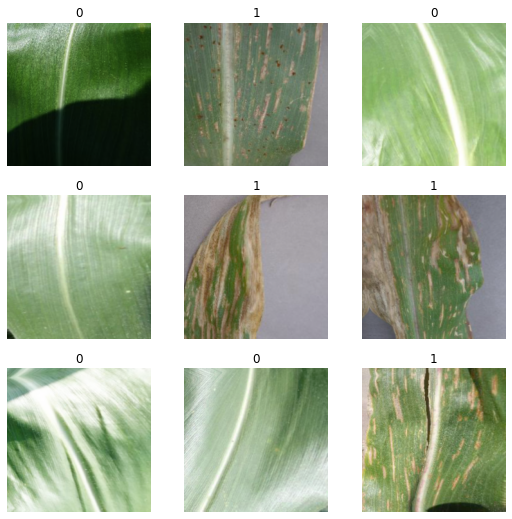

In [ ]:
dls.show_batch()

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.139879,0.019342,0.018750,00:10


epoch,train_loss,valid_loss,error_rate,time
0,0.298163,0.528312,0.062500,00:03
1,0.201766,2.741266,0.168750,00:03
2,0.150758,0.003615,0.000000,00:03
3,0.092531,0.001919,0.000000,00:03
4,0.057115,0.000759,0.000000,00:03
5,0.038466,0.000089,0.000000,00:03


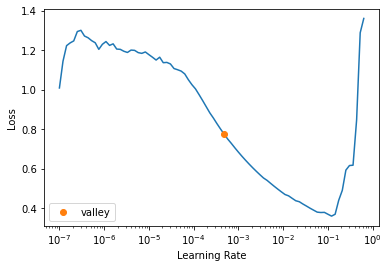

In [ ]:
from sklearn.metrics import f1_score
f1_macro = F1Score()
f1_macro.name = 'F1'

learn = vision_learner(dls, resnet50, metrics=error_rate)

learn.lr_find()
learn.fine_tune(6, 3e-2)

In [ ]:
# learn.show_results(1)
learn.lr

0.001

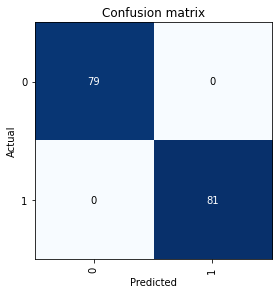

In [ ]:
ClassificationInterpretation.from_learner(learn).plot_confusion_matrix()

In [ ]:
test_dl = dls.test_dl(get_image_files("/content/gdrive/MyDrive/test_field_condition/test/all_data"), shuffle=False)

In [ ]:
file_names = get_image_files("/content/gdrive/MyDrive/test_field_condition/test/all_data")
file_names = [str(i).split('/')[-1] for i in file_names]

In [ ]:
p = learn.get_preds(dl=test_dl)

In [ ]:
p

(TensorBase([[1.0000e+00, 3.4127e-09],
             [9.9999e-01, 8.6682e-06],
             [9.9999e-01, 1.3037e-05],
             ...,
             [1.0654e-14, 1.0000e+00],
             [1.4189e-07, 1.0000e+00],
             [3.9819e-08, 1.0000e+00]]), None)

In [ ]:
class_idxs = p[0].argmax(dim=1)

In [ ]:
class_idxs

TensorBase([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0

In [ ]:
pred = pd.DataFrame(np.array(class_idxs).tolist(),columns=['pred'])
pred['fname'] = file_names

In [ ]:
pred = test_df.merge(pred, on='fname', how='inner')[['fname', 'labels', 'pred']]

In [ ]:
pred

,fname,labels,pred
0,01a02916-5d4c-4256-936b-6b1a9ee65b11___RS_GLSp 9276.JPG,1,1
1,02e6c80d-c86f-44ca-9d4c-4b100f92a839___RS_GLSp 4631.JPG,1,1
2,038464d1-47a9-4169-afb1-72c87e568a95___RS_GLSp 4480.JPG,1,1
3,05daf90f-9100-499f-a4aa-ebc5dfc20adf___RS_GLSp 7335.JPG,1,1
4,0657e6c0-5a6d-4ef3-807a-4e31e57fb683___RS_GLSp 7344 copy.jpg,1,1
...,...,...,...
870,feddfdfa-14e3-4919-a527-814888364871___R.S_HL 5530 copy.jpg,0,0
871,ff339e47-52bb-4e16-8338-d056f7dcf525___R.S_HL 8108 copy.jpg,0,0
872,ff78bd79-1823-4a96-8d42-e7cf12dc3127___R.S_HL 5546 copy 2.jpg,0,0
873,ffabec8d-50da-4a43-a3c6-a16c57700cf6___R.S_HL 5547 copy 2.jpg,0,0


In [ ]:
import pandas as pd

def calc_TP_FP_rate(y_true, y_pred):
    

    # Convert predictions to series with index matching y_true
    y_pred = pd.Series(y_pred)
    y_true = pd.Series(y_true)
    
    # Instantiate counters
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    # Determine whether each prediction is TP, FP, TN, or FN
    for i in y_true.index: 
        if y_true[i]==y_pred[i]==1:
            TP += 1
        if y_pred[i]==1 and y_true[i]!=y_pred[i]:
            FP += 1
        if y_true[i]==y_pred[i]==0:
            TN += 1
        if y_pred[i]==0 and y_true[i]!=y_pred[i]:
            FN += 1
    
    # Calculate true positive rate and false positive rate
    tpr = TP / (TP + FN)
    fpr = FP / (FP + TN)

    return tpr, fpr

In [ ]:
pred['labels'] = pd.to_numeric(pred['labels'])

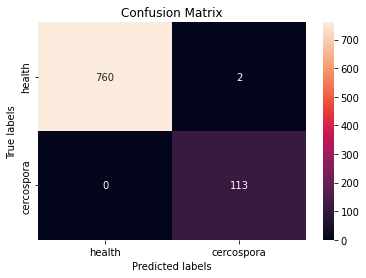

In [ ]:
import seaborn as sns
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix


accuracy = accuracy_score(pred['labels'], pred['pred'])
recall = recall_score(pred['labels'], pred['pred'])
precision = precision_score(pred['labels'], pred['pred'])
f1 = f1_score(pred['labels'], pred['pred'])
tpr, fpr = calc_TP_FP_rate(pred['labels'], pred['pred'])

cmx = confusion_matrix(pred['labels'], pred['pred'])

ax= plt.subplot()
sns.heatmap(cmx, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['health', 'cercospora']); ax.yaxis.set_ticklabels(['health', 'cercospora']);
plt.show()


In [ ]:
metrics_list = []
metrics_list.append(('resnet', 'test', accuracy, precision, recall, f1, tpr, fpr))

In [ ]:
pd.DataFrame(metrics_list, columns=['classifier', 'train_test', 'accuracy', 'precision', 'recall', 'f1', 'tpr', 'fpr']).to_csv('metrics_resnet.csv')

In [ ]:
pd.DataFrame(metrics_list, columns=['classifier', 'train_test', 'accuracy', 'precision', 'recall', 'f1', 'tpr', 'fpr'])

,classifier,train_test,accuracy,precision,recall,f1,tpr,fpr
0,resnet,test,0.997714,0.982609,1.0,0.991228,1.0,0.002625
